<a href="https://colab.research.google.com/github/Josh-robins/SPARK_AI_Medical_Imgaing_Class/blob/main/week5/machine_learning_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Numerical Data for ML
## Data Splitting
Splitting the dataset into training and testing subsets is crucial for evaluating how well a machine learning model generalizes to unseen data.

- Training Set: Used to train the model and learn the patterns.
- Testing Set: Used to evaluate the model's performance.
- Typical split ratio: 80% training and 20% testing.

### Why is it important?
- Prevents overfitting by testing the model on unseen data.
Ensures fair evaluation metrics.


In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
# Load the dataset
#file_path = '/kaggle/input/diabetes-data-set/diabetes-dataset.csv'
#diabetes_data = pd.read_csv(file_path)

# import diabtes.csv
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'

diabetes_data = pd.read_csv(file_path)

print(diabetes_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
from sklearn.model_selection import train_test_split
# Select features and target variable
features = diabetes_data.drop('Outcome', axis = 1)  # independent variables
target = diabetes_data['Outcome']                   # dependent variables

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Normalization
Normalization scales the data so all features contribute equally to the model. Algorithms like K-Means, SVM, and Logistic Regression perform better with normalized data.

- Standardization: Scales data to a mean of 0 and standard deviation of 1.
- Min-Max Scaling: Scales data to a range [0, 1].

### Why is it important?
- Prevents features with large ranges (e.g., age vs income) from dominating the learning process.
- Improves algorithm convergence.

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Selection
Feature selection involves selecting the most relevant features for training a model, which helps improve accuracy and reduces computational complexity.

### Why Use ANOVA F-Score for Feature Selection?
ANOVA (Analysis of Variance) F-score is used in feature selection because it measures how much a feature contributes to differentiating between classes in a classification problem.
1. Measures Discriminative Power
The F-score evaluates the variance between groups (different class labels) relative to the variance within each group.
A higher F-score means the feature is more useful in distinguishing between classes.
2. Works Well for Continuous Data
ANOVA F-test is specifically designed for numerical (continuous) data.
It is widely used in applications like medical diagnostics (e.g., selecting Glucose and BMI for diabetes prediction) and financial modeling.
3. Efficient and Scalable
It is a simple and fast statistical test compared to complex methods like Recursive Feature Elimination (RFE).
Works well with large datasets where computational efficiency is essential.
4. Assesses Individual Feature Importance
Unlike model-based approaches, ANOVA F-score ranks features based on their individual impact, making it easy to interpret.

### Limitations
- Assumes features are normally distributed and independent.
- Cannot capture interactions between features.

### When to Use ANOVA F-score?
- When dealing with classification problems where features are continuous and labels are categorical.
- When you need a quick and effective feature ranking method before training models.

### Methods:
- Manual Selection: Based on domain knowledge (e.g., selecting Glucose and BMI for diabetes prediction).
- Statistical Methods:
    - ANOVA F-test: Measures variance between groups.
    - Recursive Feature Elimination (RFE): Eliminates the least important features iteratively.

### How It Works
- SelectKBest:
    - Selects the top 𝑘 features based on statistical tests. Here, f_classif is used to compute the ANOVA F-scores.
- Results:
    - The ANOVA F-scores for each feature are printed.
    - The top 𝑘 features are identified and displayed.

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA to select top k features
k = 3  # Select top 3 features
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)

# Get ANOVA F-scores for all features
anova_scores = anova_selector.scores_

# Map feature names to their ANOVA F-scores
feature_names = features.columns
anova_results = dict(zip(feature_names, anova_scores))

# Display ANOVA results
print("ANOVA F-scores for Features:")
for feature, score in anova_results.items():
    print(f"{feature}: {score:.2f}")

# Selected feature indices and names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]
print("\nSelected Features (Top k):", list(selected_features))

ANOVA F-scores for Features:
Pregnancies: 27.55
Glucose: 160.77
BloodPressure: 4.15
SkinThickness: 2.06
Insulin: 7.29
BMI: 63.38
DiabetesPedigreeFunction: 14.98
Age: 52.33

Selected Features (Top k): ['Glucose', 'BMI', 'Age']


## Linear Regression

### Definition:
- Linear regression is a supervised learning algorithm used to predict a continuous outcome (numerical target). It assumes a linear relationship between the independent variable(s) (𝑋) and the dependent variable (𝑦).

### Key Concept:
- The relationship is modeled using the equation of a straight line (recall back in highschool y=mx+b):
- y=b0​+b1​x1​+b2​x2​+⋯+bn​xn​
    - y is the predicted outcome.
    - b0 is the intercept (the value of 𝑦 when 𝑥=0).
    - 𝑏1,𝑏2,…,𝑏𝑛 are the coefficients (slopes of the predictors).
    - 𝑥1,𝑥2,…,𝑥𝑛 are the independent variables (predictors).

### Metrics that we can use to evaluate linear regression models:
- Mean Squared Error (MSE):
    - Measures the average squared difference between actual and predicted values.
    - Formula: ![image.png](attachment:a3fd936d-6b44-48d0-b756-627051eee49f.png)
    - Lower values indicate better performance.


- Root Mean Squared Error (RMSE):
    - Square root of MSE; gives error in the same units as the target variable.
    - Formula: ![image.png](attachment:715e0ad6-5133-4c76-9e48-bcade9fd6310.png)
- R-Squared (𝑅^2):
    - Measures the proportion of variance in the target variable explained by the model.
    - Formula:![image.png](attachment:8fb8c7c0-6de5-461e-b812-182b7b98f104.png)
    - Ranges from 0 to 1; closer to 1 indicates a better fit.


### Example Workflow:
- Data Collection: Collect a dataset with both predictor variables (𝑋) and a continuous target (𝑦).
- Preprocessing: Handle missing values, scale the data, and split it into training and testing datasets.
- Model Training: Use libraries like sklearn to fit a regression model.
- Evaluation: Use metrics like MSE, RMSE or 𝑅^2(coefficient of determination) to assess model performance.

## Linear Regression Example:
If you wanted to predict blood pressure based on features like glucose level or BMI, you would use linear regression.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = features[['Glucose', 'BMI', 'Age']]
y = target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.43
R-Squared (R²): 0.19


## Logistic Regression
### Definition:
- Logistic regression is a supervised learning algorithm used for binary classification tasks (or multi-class classification with extensions). It estimates the probability that a given input belongs to a particular category.

### Key Concept:
- Instead of modeling the data with a straight line, logistic regression uses the sigmoid function to squeeze outputs into the range [0, 1]:
- ![image.png](attachment:32491247-2fee-409c-ac8b-6289562ec6d1.png)
    - P(y=1∣x) is the probability of the positive class (1).
    - The equation inside the sigmoid function is a linear combination of features.
- The threshold (default is 0.5) determines classification:
    - If 𝑃≥0.5, classify as 1 (positive class).
    - If 𝑃<0.5, classify as 0 (negative class).

### Example Workflow:
- Data Collection: Collect labeled data with categorical outcomes.
- Preprocessing: Normalize predictors and split the dataset.
- Model Training: Use sklearn to fit the logistic regression model.
- Evaluation: Evaluate the model using metrics like accuracy, precision, recall, and the F1-score.

### Model Evaluation for Classification (Logistic Regression):

Logistic Regression is used for binary classification problems. The following metrics are commonly used:

#### Confusion Matrix:
A matrix summarizing the counts of:
- True Positives (TP): Correctly predicted positives.
- True Negatives (TN): Correctly predicted negatives.
- False Positives (FP): Incorrectly predicted positives.
- False Negatives (FN): Incorrectly predicted negatives.
![image.png](attachment:a01f100c-b2a7-451d-aa82-45711e27e992.png)

#### Accuracy:
Measures the proportion of correct predictions.
- Formula: ![image.png](attachment:ce03c4bf-ed45-4916-b8d5-8370356b4e01.png)

#### Precision:
Proportion of positive predictions that are correct.
- Formula: ![image.png](attachment:a30f45c9-67d9-44ad-8d95-4fe3028bc873.png)
- When to prioritize? Prioritize precision when misdiagnosing a healthy patient as diabetic (FP) is worse than missing a diabetic patient (FN).
    - If incorrectly diagnosing a healthy person as diabetic leads to unnecessary stress, lifestyle changes, or expensive medical treatments.
    - Example: If the treatment is expensive or has serious side effects, you want to be sure that a positive diagnosis is correct.
    - Scenario: A high precision model will ensure that when the model says "diabetic," it is highly likely to be correct.

#### Recall (Sensitivity):
Proportion of actual positives that are correctly predicted.
- Formula: ![image.png](attachment:6076fa21-e02b-40aa-8dff-bbb26823a0ac.png)
- When to prioritize? Prioritize recall when missing a diabetic patient (FN) is worse than a false alarm (FP).
    - If missing a diabetic patient (false negative) means they won’t get treatment, leading to serious health complications.
    - Example: If early diagnosis can prevent severe diabetes-related complications, recall is crucial.
    - Scenario: A high recall model ensures that most diabetic patients are detected, even if it means some healthy people are mistakenly classified as diabetic.

#### F1-Score:
Harmonic mean of precision and recall.
- Formula: ![image.png](attachment:9f884c10-7f00-4aaa-936b-3c5d861b87f8.png)
- When to prioritize?
    - If the dataset is imbalanced (e.g., 90% non-diabetic, 10% diabetic), a model might predict "non-diabetic" most of the time and still get high accuracy. But in reality, it fails to detect diabetes.
    - Example: In a screening test for a large population, a balance between precision and recall ensures both minimizing false negatives (missed cases) and false positives (unnecessary medical tests).
    - Scenario: If both precision and recall matter, then F1-score is the best choice.

### Key Differences from Linear Regression:
![image.png](attachment:608e079c-ac8f-44d2-a7b5-d77816ff9bb1.png)

Confusion Matrix:
[[80 19]
 [20 35]]


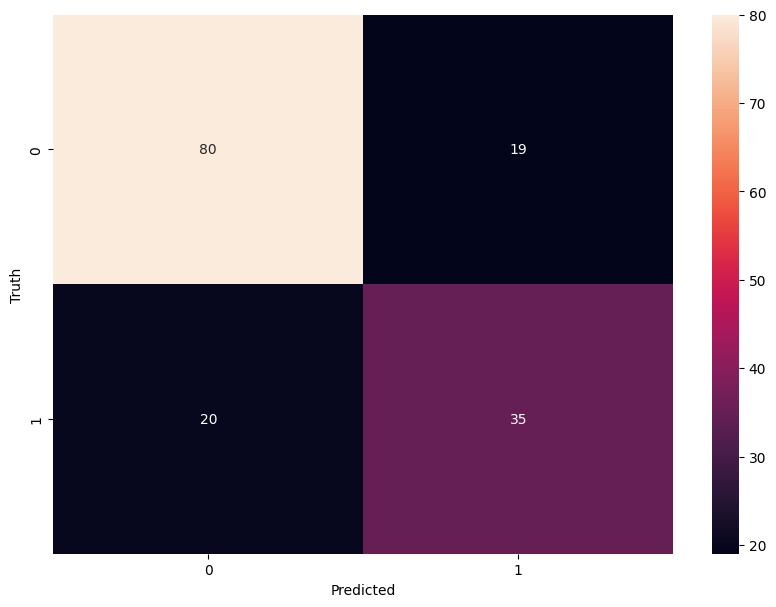

Accuracy: 0.75
Precision: 0.65
Recall: 0.64
F1-Score: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [11]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
import seaborn as sns
from matplotlib import pyplot as plt

# Define features and target
X = features[['Glucose', 'BMI', 'Age']]
y = target  # 0 = No diabetes, 1 = Diabetes

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
conf_matrix = sm.confusion_matrix(y_test, y_pred)
accuracy = sm.accuracy_score(y_test, y_pred)
precision = sm.precision_score(y_test, y_pred)
recall = sm.recall_score(y_test, y_pred)
f1 = sm.f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred))

## Logistic Regression Example:
If you wanted to predict whether someone has diabetes (Outcome column: 0 = No, 1 = Yes), you'd use logistic regression.

### What is Cross-Validation?
- Cross-validation (CV) is a resampling technique used to evaluate a machine learning model’s performance by splitting the dataset into multiple subsets (folds).
- Instead of training and testing on a single split, cross-validation rotates the training and testing process across different partitions, leading to a more generalized performance estimate.
- Note: For imbalanced datasets, we use Stratified K-Fold Cross-Validation, which ensures each fold has the same proportion of classes as the original dataset.

In [12]:
# Using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores = scores.mean()
print(scores)

0.7683048977166624


## Key Takeaways
- Linear Regression is suitable for problems where the target variable is continuous, such as predicting prices or measurements.
- Logistic Regression is ideal for binary classification problems, where the outcome is categorical, such as predicting yes/no or true/false scenarios.
- Both models have specific preprocessing needs (e.g., scaling for logistic regression), and their evaluation metrics differ based on the problem type.


## Decision Tree
A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It is a tree-like model of decisions, where:
- Internal nodes represent a test on an attribute (e.g., "Is Glucose > 120?").
- Branches represent possible outcomes of the test.
- Leaf nodes represent the final decision/classification.

### How Decision Trees Work
1. Start at the root node (the entire dataset).
2. Select the best feature to split the data, using a criterion like:
    - Gini Impurity (default in classification): Measures how often a randomly chosen element would be incorrectly classified.
    - Entropy (Information Gain): Measures the uncertainty in a dataset.
    - Mean Squared Error (MSE) (for regression): Measures variance reduction.
3. Repeat the process recursively until:
    - A stopping criterion is met (e.g., max depth reached).
    - The data is fully classified.

### Key Hyperparameters in Decision Tree Classifier
1. criterion (Splitting Measure)
    - Controls how the decision tree chooses features for splitting.
    - "gini" → Uses Gini Impurity (default). Measures how impure a node is (lower values are better). Faster and often works well for general cases.
    - "entropy" → Uses Entropy (Information Gain). Measures information gain (higher values are better). Used if dataset has categorical variables and needs interpretability.
2. max_depth (Controls Tree Depth)
    - Any integer value (default = None, meaning tree grows fully).
    - Limits how deep the tree grows.
    - A deep tree captures more details but may overfit.
    - A shallow tree prevents overfitting but may be too simple.
    - Large datasets → Use a limited depth (e.g., max_depth=5).
    - Small datasets → Allow deeper trees (default None).

### Advantages of Decision Trees
- Easy to interpret and visualize.
- Handles both numerical & categorical data.
- No need for feature scaling.
- Captures non-linear relationships well.

### Disadvantages of Decision Trees
- Prone to overfitting (solved using pruning or limiting depth).
- Sensitive to noisy data (small changes can alter structure significantly).
- Not ideal for very large datasets (other methods like Random Forest perform better).

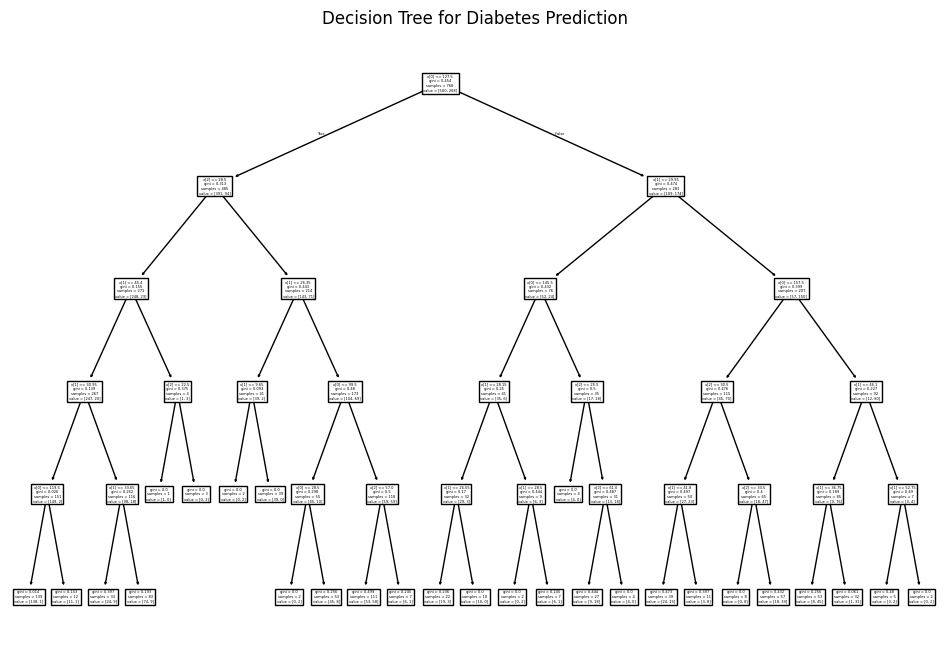

Mean CV Accuracy: 0.7395
Mean CV Precision: 0.6225
Mean CV Recall: 0.6790
Mean CV F1-Score: 0.6467

Confusion Matrix (Aggregated from CV Predictions):
[[416  84]
 [118 150]]

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.56      0.60       268

    accuracy                           0.74       768
   macro avg       0.71      0.70      0.70       768
weighted avg       0.73      0.74      0.73       768



In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Perform 5-Fold Cross-Validation directly on X and y
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')


# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation for Different Metrics
cv_accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(clf, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(clf, X, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1')

# Perform cross-validation predictions to get confusion matrix
y_pred_cv = cross_val_predict(clf, X, y)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plot the Decision Tree
clf.fit(X, y)  # Train the model
plt.figure(figsize=(12, 8))
plot_tree(clf)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()

# Print Cross-Validation Results
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_f1):.4f}")


# Display confusion matrix
print("\nConfusion Matrix (Aggregated from CV Predictions):")
print(conf_matrix)


# Display full classification report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y, y_pred_cv))

## Random Forest
- Random Forest is an ensemble learning method that combines multiple Decision Trees to improve classification or regression performance. It is widely used for tasks like disease prediction, fraud detection, stock price forecasting, and customer segmentation.

### How Does Random Forest Work?
1. Bootstrap Sampling (Bagging):
- The dataset is randomly sampled with replacement (bootstrapping) to create multiple subsets.
- Each subset is used to train a separate Decision Tree.
2. Feature Randomization:
- At each split, only a random subset of features is considered instead of all features.
- This introduces diversity in the trees and reduces correlation between them.
3. Aggregation (Voting or Averaging):
- For classification: Majority Voting is used (most common class label among trees).
- For regression: Averaging of predictions is used.

### Hyperparameters of Random Forest
1. n_estimators (Number of Trees)
- Controls how many trees the model builds (default = 100).
- Higher values improve performance but increase computation.
2. max_features (Number of Features Considered)
- Controls how many features are randomly chosen at each split.
- Options:
    - "auto" → Uses sqrt(features) for classification (default).
    - "log2" → Uses log2(features).
    - None → Uses all features.
3. the hyperparameters from Decision Trees

### Why Use Random Forest?
✅ Reduces Overfitting: Unlike Decision Trees, it generalizes better.

✅ Handles Missing Data & Noisy Data: More robust to anomalies.

✅ Works with Both Classification & Regression Tasks.

✅ Feature Importance Ranking: Helps identify key variables in prediction.

🔴 Downsides:

❌ Computationally expensive (many trees).

❌ Harder to interpret than a single Decision Tree.


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Select relevant features and target variable
X = features[['Glucose', 'BMI', 'Age']]
y = target  # 1 = Diabetic, 0 = Non-Diabetic

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)

# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation for Different Metrics
cv_accuracy = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(rf, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(rf, X, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(rf, X, y, cv=cv, scoring='f1')

# Perform cross-validation predictions to get confusion matrix
y_pred_cv = cross_val_predict(rf, X, y, cv=cv)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Print Cross-Validation Results
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_f1):.4f}")

# Display confusion matrix
print("\nConfusion Matrix (Aggregated from CV Predictions):")
print(conf_matrix)

# Display full classification report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y, y_pred_cv))

Mean CV Accuracy: 0.7642
Mean CV Precision: 0.7039
Mean CV Recall: 0.5860
Mean CV F1-Score: 0.6352

Confusion Matrix (Aggregated from CV Predictions):
[[430  70]
 [111 157]]

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       500
           1       0.69      0.59      0.63       268

    accuracy                           0.76       768
   macro avg       0.74      0.72      0.73       768
weighted avg       0.76      0.76      0.76       768



### Key Takeaways
- Cross-validation ensures better generalization compared to a single train-test split.
- Random Forest handles overfitting well by combining multiple decision trees.
- Aggregating results across folds provides a more accurate picture of model performance.


## Comparing results from Logistic Regression, Decision Tree, and Random Forest Tree, Random Frest Tree gives the best results. So this is the best model so far.

# Unsupervised Learning: Overview of K-Means and Hierarchical Clustering
- Unsupervised learning, particularly clustering, is widely used in the medical field for tasks like patient segmentation, disease classification, and treatment personalization. Let's explore two popular clustering techniques: K-Means and Hierarchical Clustering.

## K-Means Clustering
### Definition:
- K-Means clustering partitions a dataset into 𝑘 groups (clusters) by minimizing the variance within each cluster. It is a centroid-based algorithm that works iteratively to group data points based on their similarity.

#### Key Idea of K-Means
- It tries to group similar data points together while keeping them as far apart from other groups as possible.
- It does this by minimizing the intra-cluster distance (distance between points within a cluster) and maximizing the inter-cluster distance (distance between different clusters).

### Steps in K-Means:
1. Select 𝑘, the number of clusters.
2. Randomly initialize 𝑘 centroids (points representing the cluster center).
3. Assign each data point to the nearest centroid.
4. Update the centroids based on the mean of all points in the cluster.
5. Repeat steps 3–4 until centroids no longer change or a maximum number of iterations is reached.

### Key Hyperparameters of K-Means
1. Number of Clusters (K)
- The number of clusters to divide the dataset into.
- How to choose K?
    - Elbow Method: Plot the inertia (within-cluster sum of squares) for different K values and find the "elbow" point where adding more clusters doesn’t significantly reduce inertia.

2. n_init (Number of Initializations)
- K-Means is sensitive to the initial placement of centroids. Running the algorithm multiple times with different initializations can improve results.
- Recommended value: n_init = auto.

### Strengths:
- Efficient and scalable for large datasets.
- Easy to implement.
- Can handle different types of clustering problems.

### Weaknesses:
- Sensitive to the initial choice of 𝑘 and centroid placement.
- May struggle with clusters of varying sizes or non-spherical shapes.
- Requires pre-defining K (difficult when the number of clusters is unknown).


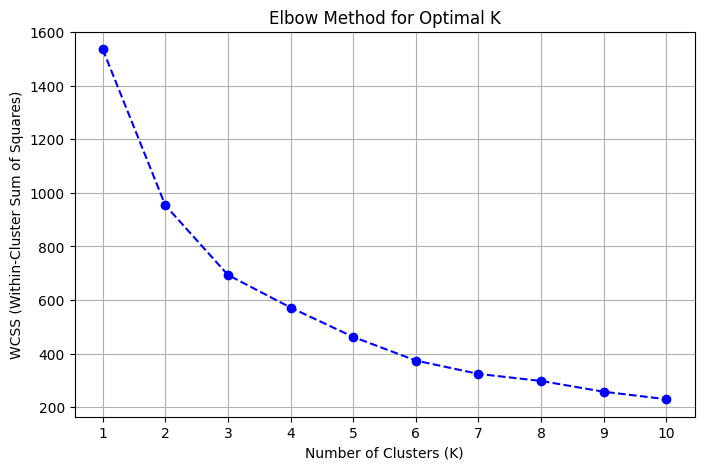

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
X = features[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Calculate WCSS (Within-Cluster Sum of Squares) for different K values
wcss = []
K_range = range(1, 11)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to nearest centroid

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
diabetes_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Glucose'], X['BMI'], c=diabetes_data['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', label='Centroids', edgecolor='black')
plt.title('K-Means Clustering (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

### K-Means Clustering Results:
- Patients are grouped into three clusters based on their Glucose and BMI levels.
- Centroids represent the central point of each cluster.
- Clusters may correspond to low, medium, and high-risk groups for diabetes based on glucose levels and BMI.